# Multi-layer Perceptron

In this notebook, we will be introducing the `keras` package. We will be using the same dataset that we used in the previous notebook. Let's create a multi-layer perceptron model.

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

ERROR (theano.sandbox.cuda): Failed to compile cuda_ndarray.cu: libcublas.so.7.5: cannot open shared object file: No such file or directory
ERROR:theano.sandbox.cuda:Failed to compile cuda_ndarray.cu: libcublas.so.7.5: cannot open shared object file: No such file or directory
WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu0 is not available  (error: cuda unavilable)


In [2]:
#read the datasets

train = pd.read_csv("../data/intro_to_ann.csv")

In [3]:
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])

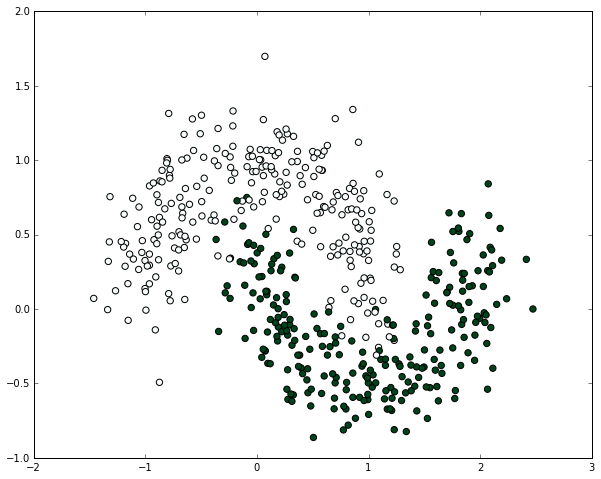

In [4]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

### Our first Multi-layer Perceptron Model

In [13]:
# We are going to build a Sequential model - adding one layer at a time
model = Sequential()

# Dense layer means a fully-connected layer. 
# The layer takes in input of dimension 2 and provides an output of dimension 1.
model.add(Dense(1, input_dim=2, init='uniform'))

# The activation function to be used for computing at that layer is tanh
model.add(Activation('tanh'))

# Define the stochastic gradient descent's parameters
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# compile the model. Provide loss function as mean squared error
model.compile(loss='mean_squared_error', optimizer=sgd, class_mode='binary')

# Fit the model
model.fit(X, y, nb_epoch=5, batch_size=2)

Epoch 1/5
500/500 [==============================] - 0s - loss: 0.1549     
Epoch 2/5
500/500 [==============================] - 0s - loss: 0.1494     
Epoch 3/5
500/500 [==============================] - 0s - loss: 0.1968     
Epoch 4/5
500/500 [==============================] - 0s - loss: 0.1962     
Epoch 5/5
500/500 [==============================] - 0s - loss: 0.1586     


In [14]:
prediction_prob = model.predict_proba(X, batch_size=16)

500/500 [==============================] - 0s     


In [15]:
prediction_prob[0:5]

array([[ 0.94874346],
       [ 0.89908028],
       [-0.16818894],
       [ 0.7748183 ],
       [ 0.84313995]])

In [16]:
prediction_classes = model.predict_classes(X, batch_size=16)

500/500 [==============================] - 0s     


In [17]:
prediction_classes[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [18]:
np.unique(prediction_classes)

array([0, 1], dtype=int32)

In [ ]:
## What does that mean?

**Exercise** Run the above code for a different batch size

**Exercise** Run the above code for more number of epochs

### Adding a second layer to the MLP

In [ ]:
model = Sequential()
model.add(Dense(2, output_dim=20, init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(20, output_dim=1, init='uniform'))
model.add(Activation('tanh'))



sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X, y, nb_epoch=20, batch_size=2)

**Exercise** Evaluate and predict the model

### Adding more layers to the MLP

In [ ]:
model = Sequential()
model.add(Dense(2, output_dim=20, init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(20, output_dim=10, init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(10, output_dim=1, init='uniform'))
model.add(Activation('softmax'))


sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X, y, nb_epoch=20, batch_size=2)

**Exercise** Evaluate and predict the model

**Exercise** In the third layer of the above model, set the activation function to `tanh` instead of `softmax`. Run the model, evaluate and predict